## Project Description
The project provides a dataset focusing on supply chain analytics. As the main data analyst for Just In Time, you will help solve key shipment and inventory management challenges.

## Objective
In this project, my primary focus is on addressing key challenges related to shipment and inventory management within the supply chain.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [105]:
orders=pd.read_csv('./Datasets/orders_and_shipments.csv',encoding='ISO-8859-1')
inventory=pd.read_csv('./Datasets/inventory.csv')

In [106]:
orders.head()

,Order ID,Order Item ID,Order YearMonth,Order Year,Order Month,Order Day,Order Time,Order Quantity,Product Department,Product Category,...,Customer Country,Warehouse Country,Shipment Year,Shipment Month,Shipment Day,Shipment Mode,Shipment Days - Scheduled,Gross Sales,Discount %,Profit
0,3535,8793,201502,2015,2,21,14:07,1,Fan Shop,Fishing,...,Mexico,Puerto Rico,2015,2,27,Standard Class,4,400,0.25,200
1,4133,10320,201503,2015,3,2,07:37,1,Fan Shop,Fishing,...,Brazil,Puerto Rico,2015,3,6,Standard Class,4,400,0.09,200
2,7396,18517,201504,2015,4,18,22:47,1,Fan Shop,Fishing,...,Mexico,Puerto Rico,2015,4,20,Standard Class,4,400,0.06,200
3,11026,27608,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,Denmark,Puerto Rico,2015,6,12,Standard Class,4,400,0.15,200
4,11026,27609,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,Denmark,Puerto Rico,2015,6,12,Standard Class,4,400,0.13,200


# Gross Sale Vs Month

C:\Users\user\AppData\Local\Temp\ipykernel_7196\157889749.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  orders['Shipment YearMonth'] = pd.to_datetime(orders['Shipment Year'].astype(str) + '-' + orders['Shipment Month'].astype(str))


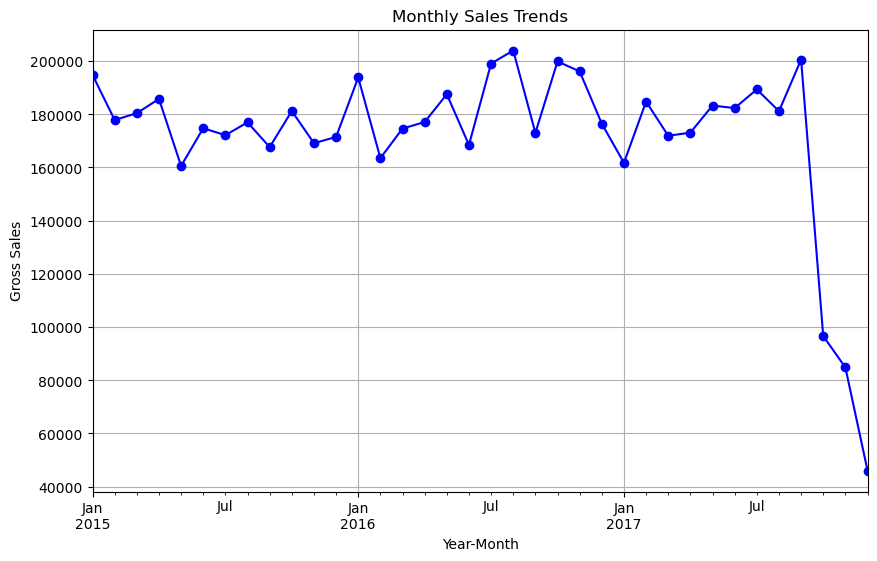

In [40]:
orders['Order YearMonth'] = pd.to_datetime(orders[' Order YearMonth '], format='%Y%m')
orders['Shipment YearMonth'] = pd.to_datetime(orders['Shipment Year'].astype(str) + '-' + orders['Shipment Month'].astype(str))
monthly_sales = orders.groupby(orders['Order YearMonth'].dt.to_period('M'))[' Gross Sales '].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Sales Trends')
plt.xlabel('Year-Month')
plt.ylabel('Gross Sales')
plt.grid()
plt.show()



# Product with Maximum and Minimum Sale

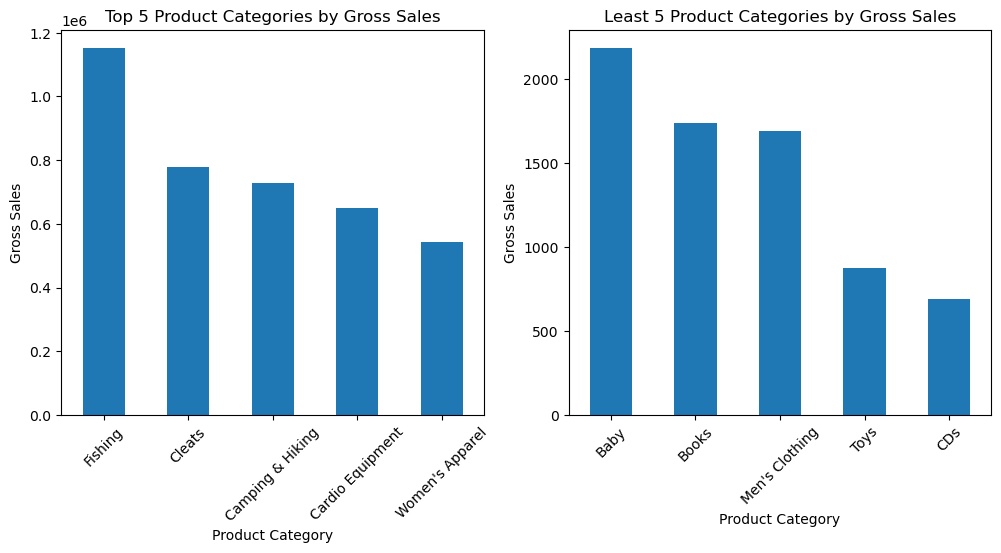

In [58]:
data= orders.groupby('Product Category')[' Gross Sales '].sum().sort_values(ascending=False)
top_categories= data.head(5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
top_categories.plot(kind='bar')
plt.title('Top 5 Product Categories by Gross Sales')
plt.xlabel('Product Category')
plt.ylabel('Gross Sales')
plt.xticks(rotation=45)
bottom_categories= data.tail(5)
plt.subplot(1,2,2)
bottom_categories.plot(kind='bar')
plt.title('Least 5 Product Categories by Gross Sales')
plt.xlabel('Product Category')
plt.ylabel('Gross Sales')
plt.xticks(rotation=45)
plt.show()

# Shipment Mode Analysis

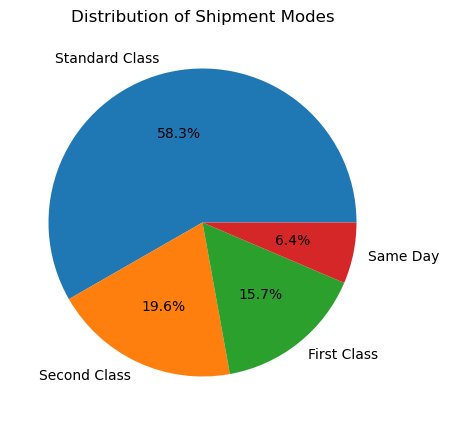

In [66]:
shipment_mode_counts = orders['Shipment Mode'].value_counts()
plt.figure(figsize=(8, 5))
shipment_mode_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Shipment Modes')
plt.ylabel('')
plt.show()

# Region wise Profit Analysis

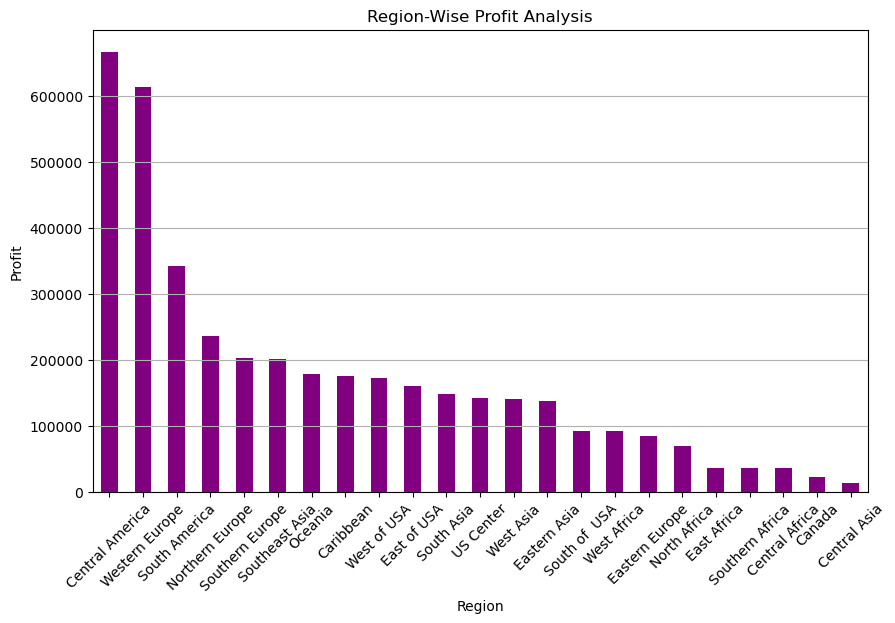

In [67]:
region_profit = orders.groupby('Customer Region')[' Profit '].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
region_profit.plot(kind='bar', color='purple')
plt.title('Region-Wise Profit Analysis')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Key Matrics

In [87]:
# Key Metrics
total_sales = orders[' Gross Sales '].sum()
total_profit = orders[' Profit '].sum()
avg_delivery_time = orders['Actual Delivery Time'].mean()
print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Average Delivery Time: {avg_delivery_time:.2f} days")

Total Sales: $6,181,476.00
Total Profit: $3,994,192.00
Average Delivery Time: 3.55 days


In [107]:
inventory.head()

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit
0,Perfect Fitness Perfect Rip Deck,201712,0,0.69517
1,Nike Men's Dri-FIT Victory Golf Polo,201712,2,1.29291
2,O'Brien Men's Neoprene Life Vest,201712,0,0.56531
3,Nike Men's Free 5.0+ Running Shoe,201712,1,1.26321
4,Under Armour Girls' Toddler Spine Surge Runni,201712,0,1.47648


In [94]:
inventory.columns

Index(['Product Name', ' Year Month ', ' Warehouse Inventory ',
       'Inventory Cost Per Unit', 'YearMonth', 'Total Inventory Cost'],
      dtype='object')

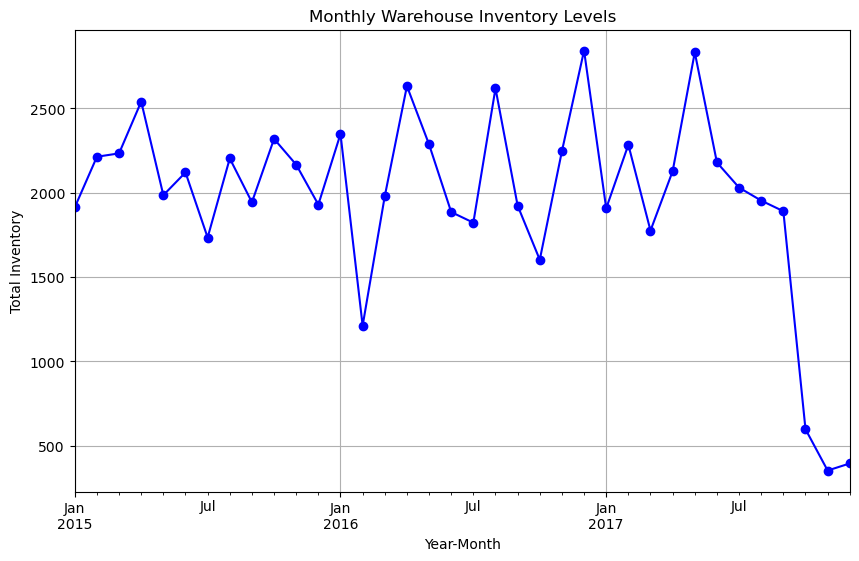

In [97]:
inventory['YearMonth'] = pd.to_datetime(inventory[' Year Month '], format='%Y%m')
monthly_inventory = inventory.groupby('YearMonth')[' Warehouse Inventory '].sum()
plt.figure(figsize=(10, 6))
monthly_inventory.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Warehouse Inventory Levels')
plt.xlabel('Year-Month')
plt.ylabel('Total Inventory')
plt.grid()
plt.show()


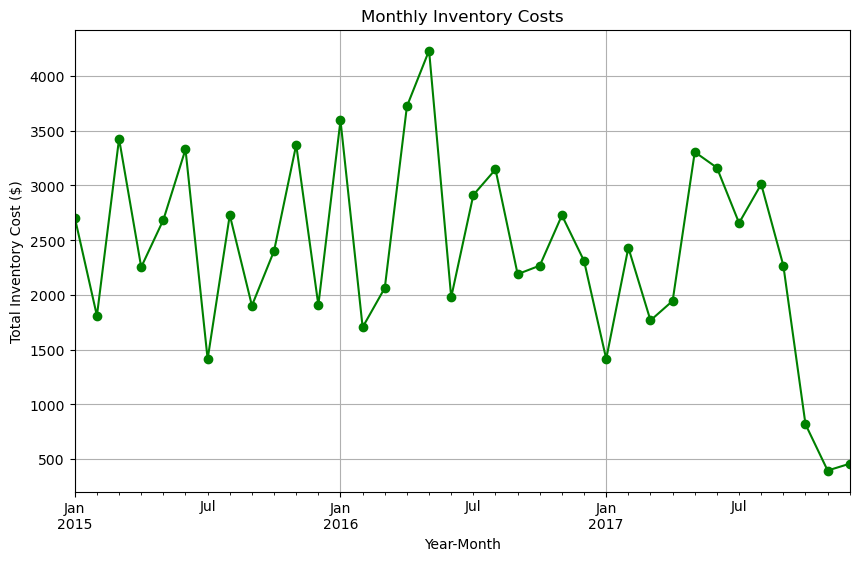

In [21]:
# 2. Cost Analysis: Total Inventory Cost Over Time
inventory['Total Inventory Cost'] = inventory[' Warehouse Inventory '] * inventory['Inventory Cost Per Unit']
monthly_cost = inventory.groupby('YearMonth')['Total Inventory Cost'].sum()

plt.figure(figsize=(10, 6))
monthly_cost.plot(kind='line', marker='o', color='green')
plt.title('Monthly Inventory Costs')
plt.xlabel('Year-Month')
plt.ylabel('Total Inventory Cost ($)')
plt.grid()
plt.show()

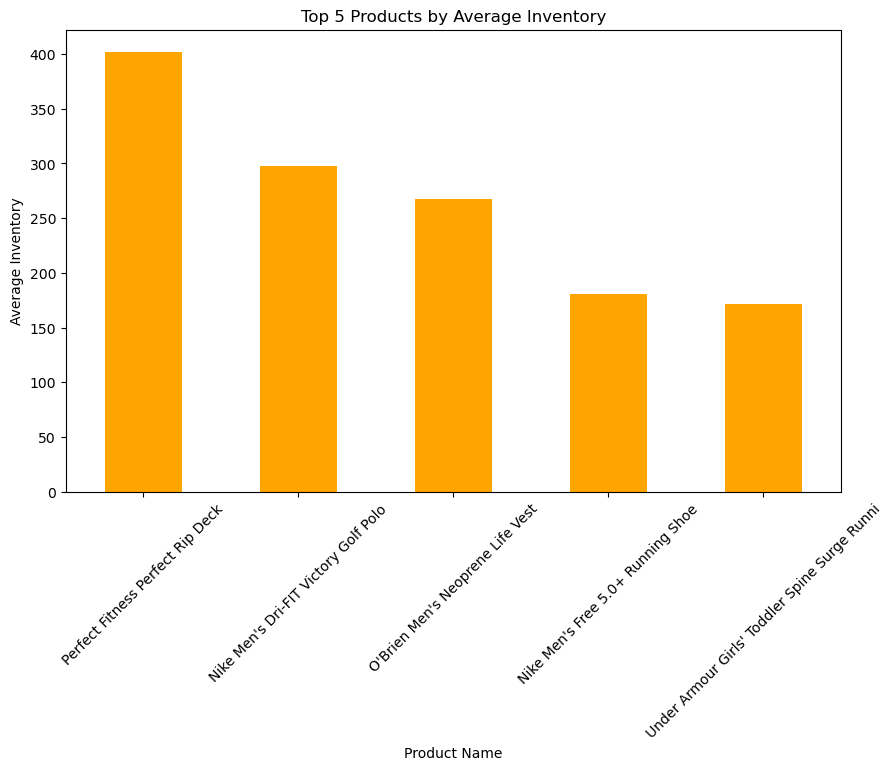

In [22]:
# 3. Top 5 Products with the Highest Average Inventory
avg_inventory_by_product = inventory.groupby('Product Name')[' Warehouse Inventory '].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
avg_inventory_by_product.plot(kind='bar', color='orange')
plt.title('Top 5 Products by Average Inventory')
plt.xlabel('Product Name')
plt.ylabel('Average Inventory')
plt.xticks(rotation=45)
plt.show()


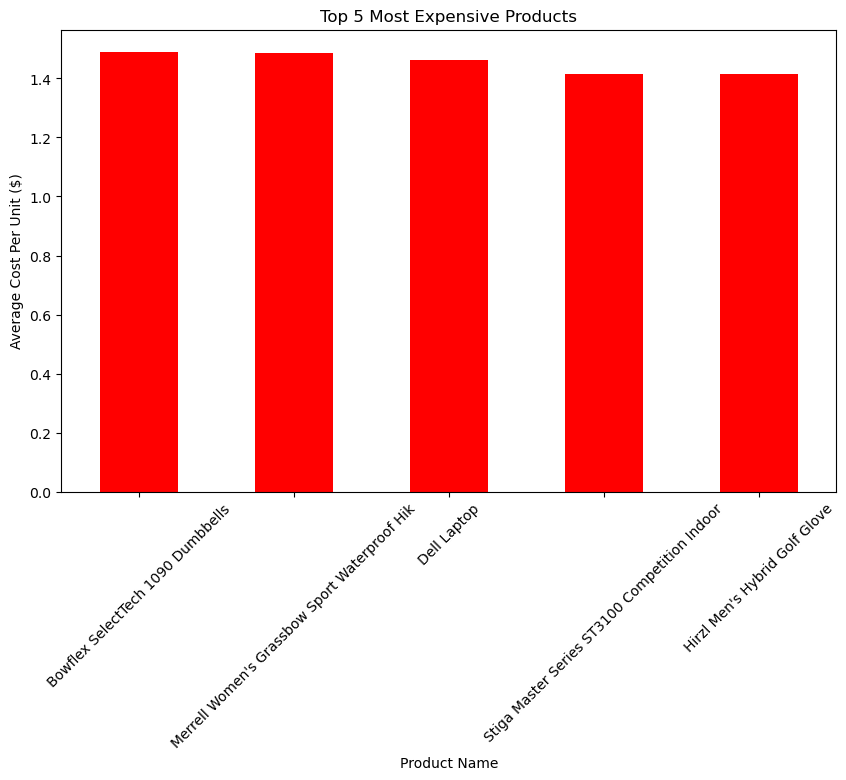

In [23]:
# 4. Most Expensive Products (Average Cost Per Unit)
expensive_products = inventory.groupby('Product Name')['Inventory Cost Per Unit'].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
expensive_products.plot(kind='bar', color='red')
plt.title('Top 5 Most Expensive Products')
plt.xlabel('Product Name')
plt.ylabel('Average Cost Per Unit ($)')
plt.xticks(rotation=45)
plt.show()


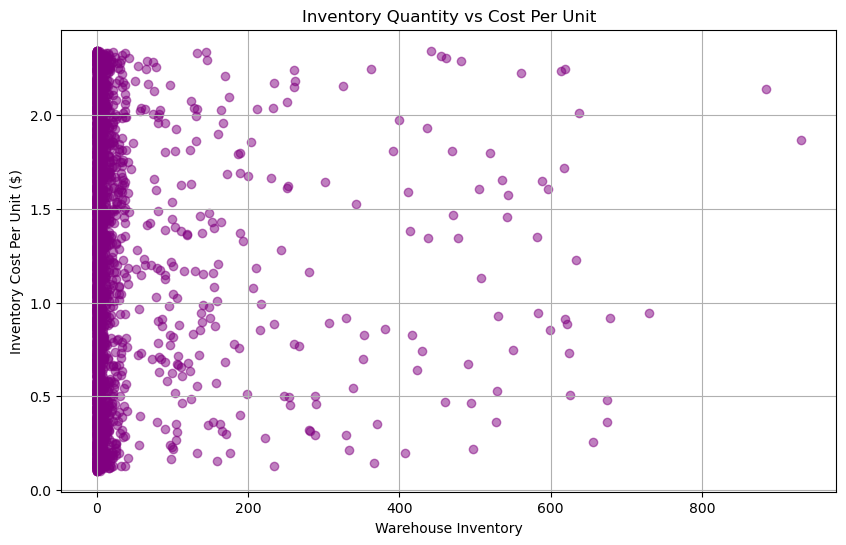

In [24]:
# 5. Inventory Efficiency: Cost vs Quantity Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(inventory[' Warehouse Inventory '], inventory['Inventory Cost Per Unit'], alpha=0.5, color='purple')
plt.title('Inventory Quantity vs Cost Per Unit')
plt.xlabel('Warehouse Inventory')
plt.ylabel('Inventory Cost Per Unit ($)')
plt.grid()
plt.show()

In [25]:
# Key Metrics
total_inventory = inventory[' Warehouse Inventory '].sum()
average_inventory_cost = inventory['Inventory Cost Per Unit'].mean()
total_inventory_cost = inventory['Total Inventory Cost'].sum()

print(f"Total Inventory: {total_inventory:,}")
print(f"Average Inventory Cost Per Unit: ${average_inventory_cost:.2f}")
print(f"Total Inventory Cost: ${total_inventory_cost:,.2f}")

Total Inventory: 71,014
Average Inventory Cost Per Unit: $1.24
Total Inventory Cost: $86,430.92
